# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [59]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [60]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [61]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [62]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [63]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The minimum, maximum and mean values are all much bigger. 

#### Question 4. Drop data points with missing data


In [64]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [67]:
df_raw = df_raw.dropna()

In [68]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [69]:
df_raw.shape

(397, 4)

In [71]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Before it showed that there were null values and now it shows 0 null values for all variables. 

#### Question 6. Create box plots for GRE and GPA

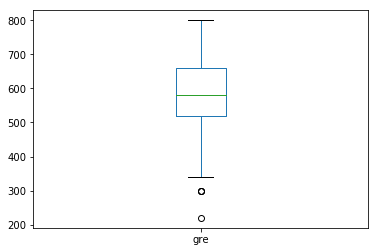

In [72]:
#boxplot 1
df_raw['gre'].plot(kind="box")

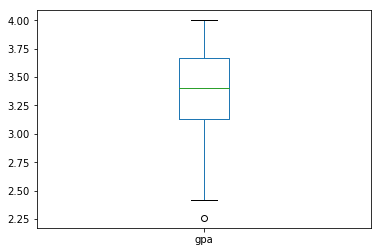

In [73]:
#boxplot 2 
df_raw['gpa'].plot(kind="box")

#### Question 7. What do this plots show?

Answer: The green line shows the mean of each variable, and the error bars show standard deviation. There are two outliers in the gre category and 1 outlier in gpa.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1180f7c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11842e1d0>]], dtype=object)

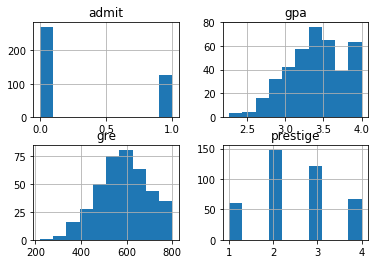

In [74]:
# plot the distribution of each variable 
df_raw.hist()

In [75]:
df_raw.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, gpa and gre are negatively skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It is skewed so you can correct this using log transformation. 

#### Question 11. Which of our variables are potentially colinear? 

In [76]:
# create a correlation matrix for the data
df_raw.corr()
#do you have to specify what method you're using? Is it automatically Pearson's?

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


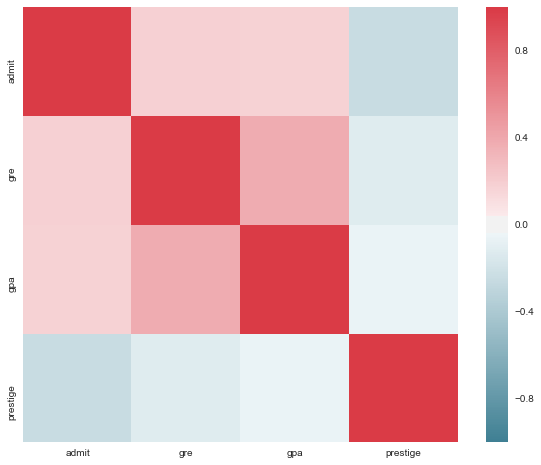

In [77]:
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = df_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Question 12. What did you find?

Answer: Prestige and admit shows negative correlation, meaning that as prestige increases, the rate of admittance decreases. There is a positive correlation between gpa and gre. This means that as gpa increases, gre increases as well. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create dummy variables for the prestige column using get_dummies with 4 levels. Get rid of the prestige column. We are trying to predict the admission rate based on the prestige of the school, and we will have to get rid of the prestige level 1 column to prevent collinearity. Then we can do logistic regression using the statsmodels logit function. The output of this function will show the coefficients, how well they fit, overall fit, and some other statistics that will help describe the model. Then you can look at the confidence interval and determine the relationship between the variables. 

#### Question 14. What is your hypothesis? 

Answer: There will be an association between grad school admission rates and the prestige of undergraduate schools. Specifically, the admission rate will be higher for students who went to more prestigious schools. 

## Knowledge Review Questions

1. What is test error and train error?

Test error—The error you get when you run the trained model on a set of data that it has previously not been exposed to. It is high when you have overfitting because it can’t generalize well. 
Training error—Error you get when you run the trained data on the trained model. It is low when you have overfitting.

2. What are ways to mitigate a situation where you have low train error but high test error?

This is what happens when you have overfitting, so you can use regularization (lasso and ridge) to mitigate overfitting. 

3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?

R-squared and MSE. You can transform the data, use cross validation, and regularization. 

4. What package would you use to explore these parameters easily and find the best model?

sklearn

5. What is the difference between Lasso and Ridge regression?

Lasso adds the extra weight to the sum of the absolute of the coefficients. It penalizes for absolute value of beta which is the coefficient, penalizes models with higher value coefficients. 

Ridge regression adds the weight to the sum of the sq of the coefficients. 

6a. When do you use which?
    
Use lasso when you want less features (sparse model) and ridge when you want the most r^2 but are ok with more features. 

6. Bonus: Explore alternatives to dropping obervations with missing data

Instead of dropping the observations, you can fill in the missing data. You need to provide a value for the missing data, and one possibility is to use the mean of all of the values. 

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?